In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path='/content/drive/MyDrive/DataSource/Chapter06DataSet.csv'
df=pd.read_csv(path)
pd.DataFrame(df)

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


##1. Business Understanding

Sabarudin Hidayah is a program director for a major health insurance provider. Recently he has been reading in medical journals and other articles, and found a strong emphasis on the influence of weight, gender, and cholesterol on the development of coronary heart disease. The research he's read confirm time after time that there is a connection between these three variables and while there is little that can be done about one's gender, there are certainly life choices that can be made to alter one's cholesterol and weight.
He begins brainstorming ideas for his company to offer weight and cholesterol management programs to individuals who receive health insurance through employer. As she considers where her effort might be most effective, he finds herself wondering if there are natural groups of individuals who are most at risk for high weight and high cholesterol, and if there are such groups where the natural dividing lines between the groups occur.

##2. Data Understanding



In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['Cholesterol', 'Gender'], **{})
chart

<Figure size 600x600 with 0 Axes>

**Analisis Cholesterol**

Kolesterol Total
- Normal : <200 mg/dL atau 5.2 mmol/liter

Kolesterol LDL (Low-Density Lipoprotein/kolesterol jahat)
- Normal : <100 mg/dL atau 2.6 mmol/L

Kolesterol HDL (High-Density Lipoprotein/kolesterol baik)
- Normal : <40 mg/dL (pria), <50 mg/dL (wanita)


In [ ]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_9, *['Cholesterol'], **{})
chart

**Analisis kolesterol berdasarkan jumlah nasabah**

1. ada lebih dari 50 nasabah asuransi yang teridentifikasi high cholesterol (ditunjukkan pada grafik di range 200-240)

In [ ]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_11, *['Weight', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

**Analisis Kolesterol dan Weight**

terdapat pola hubungan berbanding lurus antara cholesterol dan weight

artinya jika weight bertambah maka cholesterol akan bertambah

In [ ]:
chart = scatter_plot(_df_11, *['Gender', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

**Analisis Gender dan cholesterol**

Laki-laki dan perempuan memiliki peluang yang sama akan kolesterol tinggi, sehingga gender tidak mempengaruhi tinggi rendahnya kolesterol

##3. Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

*tidak dilakukan preparasi data karena data dalam keadaan bersih dan memiliki tipe data yang sesuai dengan algoritmanya yaitu numerik*

##4. Data Modelling (clustering)

menentukan berapa nilai k yang akan diinput ke dalam n cluster

menggunakan elbow method untuk menentukan nilai k yang optimum

In [ ]:
!pip install kMeans


  Preparing metadata (setup.py) ... done
  Created wheel for kMeans: filename=kmeans-1.0.2-cp310-cp310-linux_x86_64.whl size=12525 sha256=fd63fd767f0cf719b8f805485b548e3373d741b5242175dcc2de143895aa3ceb
  Stored in directory: /root/.cache/pip/wheels/46/bb/83/beb390fc9fcc845a65a82eb476fc1697e9b8ab5fb795beb220
Successfully built kMeans


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Menentukan input variabel
x=df[['Weight','Cholesterol','Gender']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

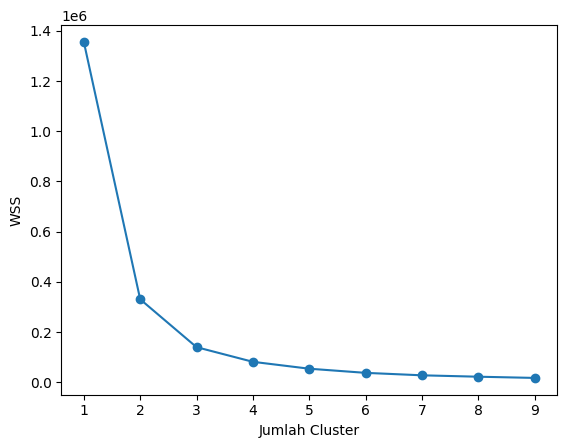

In [ ]:
from sklearn.cluster import KMeans
#Elbow method
cluster_range=range(1,10)
cluster_wss=[]

for num_cluster in cluster_range:
  cluster=KMeans(num_cluster)
  cluster.fit(x)
  cluster_wss.append(cluster.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show()

**Elbow Method**
adalah salah satu teknik untuk menentukan n cluster terbaik

wss = within-cluster sum of squares

#Pemodelan K-Means

In [ ]:
cls=KMeans(n_clusters=4, random_state=0)

#membentuk model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df['cluster']=model_cls.labels_

df

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2
...,...,...,...,...
542,172,207,1,0
543,129,157,1,2
544,107,115,1,1
545,117,147,1,2


##4. Visualisasi Cluster

In [ ]:
df['cluster'].value_counts()

1    152
0    147
2    140
3    108
Name: cluster, dtype: int64

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter(df, x='Weight', y='Cholesterol', color='cluster',
               size='Weight', hover_data=['Cholesterol'])
fig.show()

**Analisis Hasil Cluster**

Didapat 4 kelompok orang yang beresiko jantung koroner. Berikut cluster berdasarkan resiko
1. **Cluster 0** : Cluster High Risk, kelompok yang memiliki resiko tinggi jantung koroner
2. **Cluster 3** : Cluster Potential High Risk, kelompok yang memiliki kecenderungan resiko tinggi jantung koroner. Hal ini ditunjukkan cholesterol dan weight berada pada ambang batas normal
3. **Cluster 2** : CLuster Moderat, kelompok yang berada di antara low risk dan high potential risk
4. **Cluster 1** : Cluster Low Risk, kelompok yang memiliki resiko rendah jantung koroner

Berapakah jumlah nasabah yang akan di prospek untuk mengikuti program baru "Treatment" mengurangi resiko jantung koroner?

= Penjumlahan cluster 0 dan cluster 3 yaitu 255 org